import library

In [159]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


link "https://raw.githubusercontent.com/vaa9/propertydataset1/main/propertydatasetfix"

load dataset

In [160]:
import pandas as pd
url = "https://raw.githubusercontent.com/vaa9/propertydataset1/main/propertydatasetfix"
df = pd.read_csv(url)
df.head(40)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Below Standard,Setro Baru Utara,30,60,2,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
1,Standard,Kenjeran,170,170,5,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
2,Sangat Premium,Kenjeran,187,250,5,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
3,Premium,Kenjeran,350,600,5,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
4,Premium,Kenjeran,450,530,5,6.0,2.0,10800000000,Belum,NaN,Standard,1-2 Mobil
5,Below Standard,Gubeng,96,60,2,1.0,1.0,390000000,Belum,NaN,Standard,1-2 Mobil
6,Premium,Gubeng,85,100,3,2.0,2.0,725000000,Belum,NaN,Standard,1-2 Mobil
7,Below Standard,Sawahan,72,120,4,1.0,1.0,775000000,Belum,Barat,Tikungan/Hook,< 1 Mobil
8,Standard,Gubeng,50,100,2,2.0,2.0,850000000,Belum,NaN,Standard,1-2 Mobil
9,Standard,Mulyorejo,72,72,3,2.0,1.0,1100000000,Belum,Selatan,Standard,> 2 Mobil


Data Preparation

1. cek apakah masih ada missing value pada data
2. lakukan label encoder
3. lakukan feature scaling pada data

In [161]:
df.isnull().sum()

Area Category                      0
Nama Daerah                        0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 1
Tingkat/Lantai                     1
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  82
Posisi Rumah                     115
Lebar Jalan Depan Rumah (ROW)     41
dtype: int64

mengisi missing value dengan random untuk yang memiliki banyak missing value, dan mengisi dengan modus pada missing value yang hanya 1

In [162]:
from random import choices
arahhadap =["Utara","Selatan", "Timur", "Barat"]
posisirumah =["Tusuk Sate","Tikungan/Hook","Tusuk Belakang/Membelakangi Jalan","Kantong Belakang/Ngantong","Standard","Cul De Sac/Ujung Gang Buntu"]
lebarjalan =["< 1 Mobil","1-2 Mobil","> 2 Mobil"]
isiarah = choices(arahhadap, k=82)
isiposisi = choices(posisirumah, k=115)
isilebar = choices(lebarjalan, k=41)
df['Jumlah Kamar Mandi'].replace([np.nan], df['Jumlah Kamar Mandi'].mode()[0], inplace=True)

df['Tingkat/Lantai '].replace([np.nan], df['Tingkat/Lantai '].mode()[0], inplace=True)
for i in df['Arah Hadap Rumah'].isnull():
  df['Arah Hadap Rumah'].replace([np.nan], isiarah[i], inplace=True)

for i in df['Posisi Rumah'].isnull():
  df['Posisi Rumah'].replace([np.nan], isiposisi[i], inplace=True)

for i in df['Lebar Jalan Depan Rumah (ROW)'].isnull():
  df['Lebar Jalan Depan Rumah (ROW)'].replace([np.nan], isilebar[i], inplace=True)



In [163]:
df.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

transform data with label encoder

In [164]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for cat_var in ['Area Category', 'Nama Daerah',  'Terjual/Belum','Harga Penawaran (dari Owner)','Arah Hadap Rumah', 'Posisi Rumah','Lebar Jalan Depan Rumah (ROW)' ]:
    df[cat_var] = le.fit_transform(df[cat_var])  
df['Luas Tanah (m2)'] = df['Luas Tanah (m2)'].astype(float)
df['Luas Bangunan (m2)'] = df['Luas Bangunan (m2)'].astype(float)
df['Jumlah Kamar'] = df['Jumlah Kamar'].astype(float)
df['Jumlah Kamar Mandi'] = df['Jumlah Kamar Mandi'].astype(float)
df['Tingkat/Lantai '] = df['Tingkat/Lantai '].astype(float)
df['Harga Penawaran (dari Owner)'].replace(' ','')




df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0,100,30.0,60.0,2.0,1.0,2.0,79,0,2,2,1
1,3,48,170.0,170.0,5.0,4.0,2.0,74,0,1,0,0
2,2,48,187.0,250.0,5.0,5.0,2.0,84,0,3,2,0
3,1,48,350.0,600.0,5.0,5.0,2.0,124,0,0,2,0
4,1,48,450.0,530.0,5.0,6.0,2.0,5,0,2,2,0


In [165]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
X=df


In [166]:
sc = StandardScaler()
standard = pd.DataFrame(sc.fit_transform(X),columns=X.columns)
scaled_features = sc.fit(df)

K-Means

elbow method

In [167]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# set the parameter for evaluating K
kmeans_kwargs = {
"init": "random",
"n_init": 300,
"random_state": 42,
}
# check the inertia for each K
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


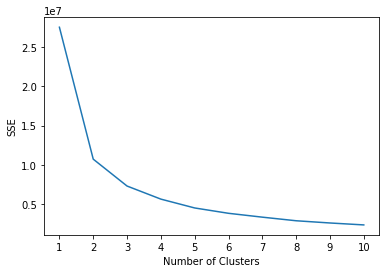

In [168]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [169]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
findknee = KneeLocator(range(1,11),sse, curve="convex", direction="decreasing")
print("best k for model is", findknee.elbow)

best k for model is 3


Training model K-Means pada dataset dengan jumlah cluster yang ditentukan

In [170]:
from sklearn.cluster import AgglomerativeClustering
cl = AgglomerativeClustering(3)
cls = cl.fit_predict(X)
df['Cluster']=cls
df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,0,100,30.0,60.0,2.0,1.0,2.0,79,0,2,2,1,0
1,3,48,170.0,170.0,5.0,4.0,2.0,74,0,1,0,0,0
2,2,48,187.0,250.0,5.0,5.0,2.0,84,0,3,2,0,0
3,1,48,350.0,600.0,5.0,5.0,2.0,124,0,0,2,0,2
4,1,48,450.0,530.0,5.0,6.0,2.0,5,0,2,2,0,2


In [171]:
df.groupby("Cluster").agg(area_category = ('Area Category', pd.Series.mode),
                                  daerah = ('Nama Daerah', pd.Series.mode),
                                  luas_tanah = ('Luas Tanah (m2)','mean'),
                                  luas_bangunan = ('Luas Bangunan (m2)','mean'),
                                  jumlah_kamar = ('Jumlah Kamar', pd.Series.mode),
                                  jumlah_kamar_mandi = ('Jumlah Kamar Mandi', pd.Series.mode),
                                  tingkat = ('Tingkat/Lantai ', pd.Series.mode),
                                  harga_penawaran = ('Harga Penawaran (dari Owner)','mean'),
                                  terjual = ('Terjual/Belum', pd.Series.mode),
                                  hadap = ('Arah Hadap Rumah', pd.Series.mode),
                                  posisi = ('Posisi Rumah', pd.Series.mode),
                                  lebarjalan = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode),
                                  count=("Cluster", 'count'))

ValueError: ignored

HIERARCHICAL CLUSTERING

Hierarchical clustering ini menggunakan metode agglomerative.

Plot Dendrogram untuk membantu menentukan jumlah cluster, gunakan Single, Ward, Complete, Average

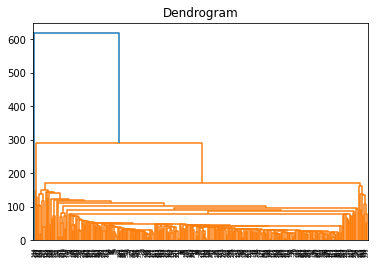

In [172]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Dendrogram')
plt.show()

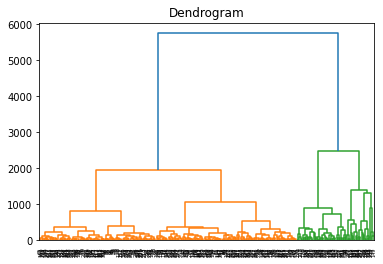

In [173]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.show()

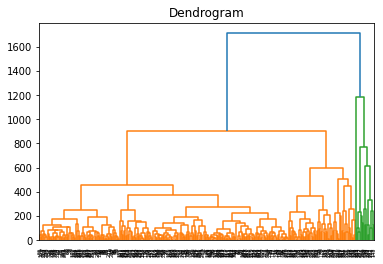

In [174]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.title('Dendrogram')
plt.show()

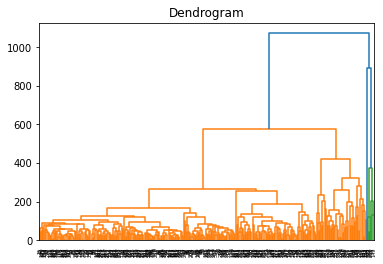

In [175]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.title('Dendrogram')
plt.show()

In [176]:
from sklearn.cluster import AgglomerativeClustering
cl = AgglomerativeClustering(4,affinity = 'euclidean', linkage = 'single')
hirarsingle = cl.fit_predict(X)
df['Cluster']=hirarsingle
df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,0,100,30.0,60.0,2.0,1.0,2.0,79,0,2,2,1,1
1,3,48,170.0,170.0,5.0,4.0,2.0,74,0,1,0,0,1
2,2,48,187.0,250.0,5.0,5.0,2.0,84,0,3,2,0,1
3,1,48,350.0,600.0,5.0,5.0,2.0,124,0,0,2,0,1
4,1,48,450.0,530.0,5.0,6.0,2.0,5,0,2,2,0,1


In [177]:
df.groupby("Cluster").agg(area_category = ('Area Category', pd.Series.mode),
                                  daerah = ('Nama Daerah', pd.Series.mode),
                                  luas_tanah = ('Luas Tanah (m2)','mean'),
                                  luas_bangunan = ('Luas Bangunan (m2)','mean'),
                                  jumlah_kamar = ('Jumlah Kamar', pd.Series.mode),
                                  jumlah_kamar_mandi = ('Jumlah Kamar Mandi', pd.Series.mode),
                                  tingkat = ('Tingkat/Lantai ', pd.Series.mode),
                                  harga_penawaran = ('Harga Penawaran (dari Owner)','mean'),
                                  terjual = ('Terjual/Belum', pd.Series.mode),
                                  hadap = ('Arah Hadap Rumah', pd.Series.mode),
                                  posisi = ('Posisi Rumah', pd.Series.mode),
                                  lebarjalan = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode),
                                  count=("Cluster", 'count'))

ValueError: ignored

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cl = AgglomerativeClustering(4,affinity = 'euclidean', linkage = 'ward')
hirarward = cl.fit_predict(X)
df['Cluster']=hirarward
df.head(5)

In [ ]:
df.groupby("Cluster").agg(area_category = ('Area Category', pd.Series.mode),
                                  daerah = ('Nama Daerah', pd.Series.mode),
                                  luas_tanah = ('Luas Tanah (m2)','mean'),
                                  luas_bangunan = ('Luas Bangunan (m2)','mean'),
                                  jumlah_kamar = ('Jumlah Kamar', pd.Series.mode),
                                  jumlah_kamar_mandi = ('Jumlah Kamar Mandi', pd.Series.mode),
                                  tingkat = ('Tingkat/Lantai ', pd.Series.mode),
                                  harga_penawaran = ('Harga Penawaran (dari Owner)','mean'),
                                  terjual = ('Terjual/Belum', pd.Series.mode),
                                  hadap = ('Arah Hadap Rumah', pd.Series.mode),
                                  posisi = ('Posisi Rumah', pd.Series.mode),
                                  lebarjalan = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode),
                                  count=("Cluster", 'count'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cl = AgglomerativeClustering(4,affinity = 'euclidean', linkage = 'complete')
hirarcomp = cl.fit_predict(X)
df['Cluster']=hirarcomp
df.head(5)

In [ ]:
df.groupby("Cluster").agg(area_category = ('Area Category', pd.Series.mode),
                                  daerah = ('Nama Daerah', pd.Series.mode),
                                  luas_tanah = ('Luas Tanah (m2)','mean'),
                                  luas_bangunan = ('Luas Bangunan (m2)','mean'),
                                  jumlah_kamar = ('Jumlah Kamar', pd.Series.mode),
                                  jumlah_kamar_mandi = ('Jumlah Kamar Mandi', pd.Series.mode),
                                  tingkat = ('Tingkat/Lantai ', pd.Series.mode),
                                  harga_penawaran = ('Harga Penawaran (dari Owner)','mean'),
                                  terjual = ('Terjual/Belum', pd.Series.mode),
                                  hadap = ('Arah Hadap Rumah', pd.Series.mode),
                                  posisi = ('Posisi Rumah', pd.Series.mode),
                                  lebarjalan = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode),
                                  count=("Cluster", 'count'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cl = AgglomerativeClustering(4,affinity = 'euclidean', linkage = 'average')
hirarave = cl.fit_predict(X)
df['Cluster']=hirarave
df.head(5)

In [ ]:
df.groupby("Cluster").agg(area_category = ('Area Category', pd.Series.mode),
                                  daerah = ('Nama Daerah', pd.Series.mode),
                                  luas_tanah = ('Luas Tanah (m2)','mean'),
                                  luas_bangunan = ('Luas Bangunan (m2)','mean'),
                                  jumlah_kamar = ('Jumlah Kamar', pd.Series.mode),
                                  jumlah_kamar_mandi = ('Jumlah Kamar Mandi', pd.Series.mode),
                                  tingkat = ('Tingkat/Lantai ', pd.Series.mode),
                                  harga_penawaran = ('Harga Penawaran (dari Owner)','mean'),
                                  terjual = ('Terjual/Belum', pd.Series.mode),
                                  hadap = ('Arah Hadap Rumah', pd.Series.mode),
                                  posisi = ('Posisi Rumah', pd.Series.mode),
                                  lebarjalan = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode),
                                  count=("Cluster", 'count'))